In [387]:
import torch
import hiddenlayer as hl

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [388]:
data = pd.read_csv("/mnt/g/onlinelessons/deep learning/dataset/bike-sharing-demand/bike_sharing.csv", index_col=0)

In [389]:
data.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
459,04-04-2019,2,1,4,0,3,1,1,22.208347,26.67250,46.9583,12.125325,1058,5378,6436
395,30-01-2019,1,1,1,0,1,1,1,11.035847,13.13125,40.0833,14.458064,126,3498,3624
366,01-01-2019,1,1,1,0,0,0,1,15.170000,18.78105,69.2500,12.875189,686,1608,2294
477,22-04-2019,2,1,4,0,0,0,3,16.263347,19.47520,83.5417,23.084582,120,907,1027
35,04-02-2018,1,0,2,0,5,1,2,8.663464,11.42935,58.5217,8.565213,88,1620,1708


In [390]:
data.shape

(730, 15)

Text(0.5, 1.0, 'number of bikes rented per season')

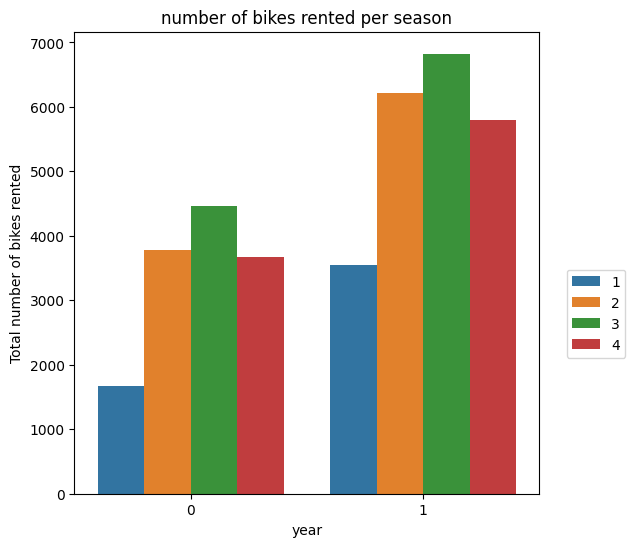

In [391]:
plt.figure(figsize=(6,6))
sns.barplot(x='yr', y='cnt', hue='season', data=data, errorbar=None)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5))
            
plt.xlabel('year') 
plt.ylabel("Total number of bikes rented")
            
plt.title("number of bikes rented per season")

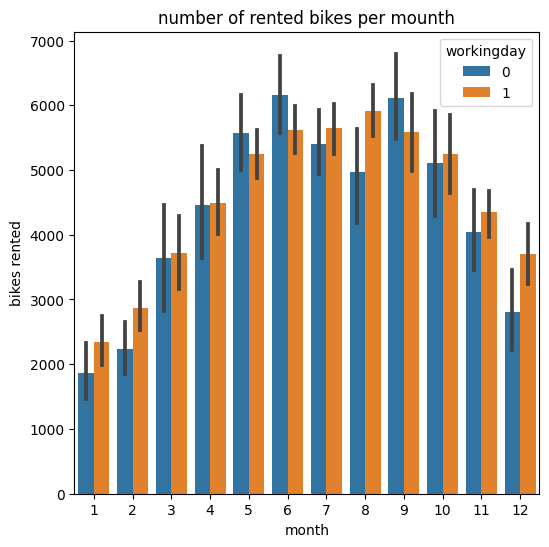

In [392]:
plt.figure(figsize=(6,6))
sns.barplot(x='mnth', y='cnt', hue='workingday', data=data)

plt.xlabel('month')
plt.ylabel('bikes rented')
plt.title("number of rented bikes per mounth")

plt.show()

Text(0.5, 1.0, 'Effect of temperature on rented bikes')

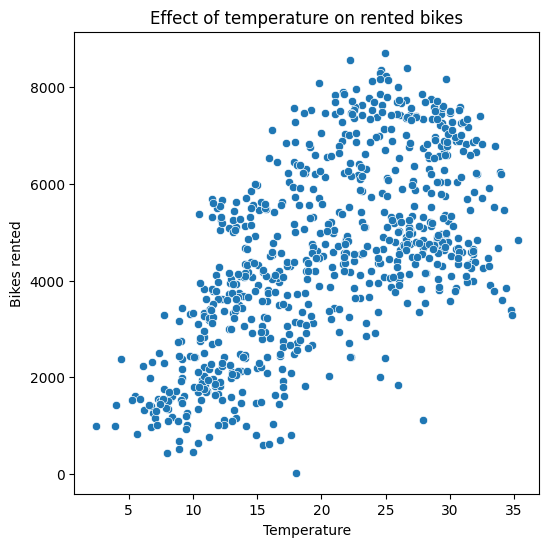

In [393]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='temp', y='cnt', data=data)

plt.xlabel("Temperature")
plt.ylabel("Bikes rented")

plt.title("Effect of temperature on rented bikes")

In [394]:
data = pd.get_dummies(data, columns=['season'])
data.sample(5)

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,,,,
240,28-08-2018,0,8,0,0,0,1,28.989419,32.39795,56.1765,20.412153,1415,2919,4334,0,0,1,0
683,14-11-2019,1,11,0,3,1,1,11.855847,14.07815,55.2083,13.374875,373,5122,5495,0,0,0,1
583,06-08-2019,1,8,0,1,1,2,30.852500,35.51230,65.4167,8.666718,1233,5780,7013,0,0,1,0
97,07-04-2018,0,4,0,4,1,1,17.937500,21.68480,60.2917,10.874904,571,2570,3141,0,1,0,0
620,12-09-2019,1,9,0,3,1,1,24.565847,28.50375,57.7083,8.833682,1050,6820,7870,0,0,1,0


In [395]:
feature_columns=['registered', 'holiday', 'weekday',
                 'weathersit', 'temp', 'atemp',
                 'season_1', 'season_2', 'season_3',
                 'season_4']
features = data[feature_columns]
target = data[['cnt']]
target

,cnt
instant,
1,985
2,801
3,1349
4,1562
5,1600
...,...
726,2114
727,3095
728,1341


In [396]:
from sklearn.model_selection import train_test_split

In [397]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)
                                                    

In [398]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [399]:
X_train_tensor.shape

torch.Size([584, 10])

In [400]:
y_test_tensor.shape

torch.Size([146, 1])

In [401]:
import torch.utils.data as data_utils

In [402]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [403]:
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [404]:
len(train_loader)

6

In [405]:
features_batch, targets_batch = next(iter(train_loader))

In [406]:
features_batch.shape

torch.Size([100, 10])

In [407]:
targets_batch.shape

torch.Size([100, 1])

In [408]:
input_size = X_train_tensor.shape[1]
output_size = 1
hidden_layer_size = 10

In [409]:
loss_fn = torch.nn.MSELoss()

In [3]:
model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_layer_size),
                            torch.nn.Linear(hidden_layer_size, output_size))

NameError: name 'torch' is not defined

In [1]:
hl.build_graph(model, torch.zeros([hidden_layer_size, input_size])).build_dot()

NameError: name 'hl' is not defined

In [412]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [413]:
total_step = len(train_loader)

num_epochs = 10000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if epoch % 2000 == 0:
            print(f"Epoch [{epoch + 1}]/[{epoch}], Step: {i+1}/{total_step}, Loss: {loss.item():.4f}") 
            

Epoch [1]/[0], Step: 1/6, Loss: 20742250.0000
Epoch [1]/[0], Step: 2/6, Loss: 22111504.0000
Epoch [1]/[0], Step: 3/6, Loss: 25620258.0000
Epoch [1]/[0], Step: 4/6, Loss: 25280558.0000
Epoch [1]/[0], Step: 5/6, Loss: 25333190.0000
Epoch [1]/[0], Step: 6/6, Loss: 25270378.0000
Epoch [2001]/[2000], Step: 1/6, Loss: 21980062.0000
Epoch [2001]/[2000], Step: 2/6, Loss: 24293634.0000
Epoch [2001]/[2000], Step: 3/6, Loss: 24940288.0000
Epoch [2001]/[2000], Step: 4/6, Loss: 23908580.0000
Epoch [2001]/[2000], Step: 5/6, Loss: 23543354.0000
Epoch [2001]/[2000], Step: 6/6, Loss: 19811760.0000
Epoch [4001]/[4000], Step: 1/6, Loss: 21872578.0000
Epoch [4001]/[4000], Step: 2/6, Loss: 21233772.0000
Epoch [4001]/[4000], Step: 3/6, Loss: 21304460.0000
Epoch [4001]/[4000], Step: 4/6, Loss: 23676080.0000
Epoch [4001]/[4000], Step: 5/6, Loss: 22843284.0000
Epoch [4001]/[4000], Step: 6/6, Loss: 23217744.0000
Epoch [6001]/[6000], Step: 1/6, Loss: 24696012.0000
Epoch [6001]/[6000], Step: 2/6, Loss: 19743856.0

In [414]:
model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [415]:
sample = x_test.iloc[21]
sample

registered    5038.000000
holiday          0.000000
weekday          6.000000
weathersit       1.000000
temp            27.811653
atemp           30.903550
season_1         0.000000
season_2         0.000000
season_3         1.000000
season_4         0.000000
Name: 595, dtype: float64

In [416]:
sample_tensor = torch.tensor(sample, dtype=torch.float)
sample_tensor

tensor([5.0380e+03, 0.0000e+00, 6.0000e+00, 1.0000e+00, 2.7812e+01, 3.0904e+01,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00])

In [417]:
with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted: ", y_pred.item())
print("Actual: ", y_test.iloc[21])

Predicted:  479.75091552734375
Actual:  cnt    7865
Name: 595, dtype: int64


In [418]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [419]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(146, 1)

In [420]:
y_test.values.shape

(146, 1)

In [421]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
compare_df.sample(10)

,actual,predicted
136,5501,479.750885
82,7403,479.750885
48,4826,479.750885
85,1406,479.750885
73,5115,479.750885
140,6133,479.750885
12,6830,479.750885
51,7273,479.750885
101,3214,479.750885
144,4127,479.750916


In [422]:
sklearn.metrics.r2_score(y_test, y_pred)

-4.393344332848307

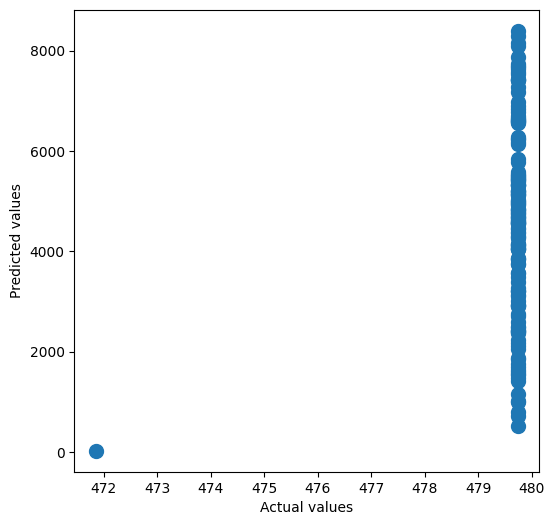

In [423]:
plt.figure(figsize=(6,6))

plt.scatter(y_pred, y_test.values, s=100)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()